# Procesos estocásticos

Construyendo procesos estocásticos

## Procesos puramente aleatorios

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

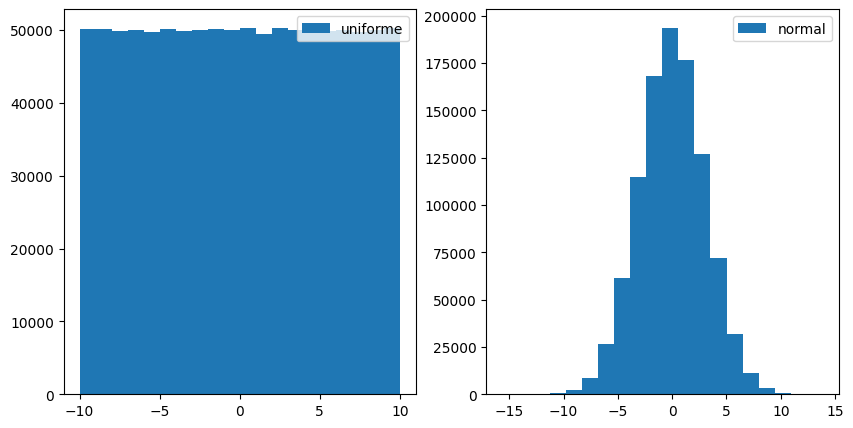

In [22]:
# creamos un objeto generador
gen = np.random.default_rng()
# generamos una tira de numeros uniformes al azar
n = 1000000
x = gen.uniform(-10,10, size = n)
# generamos una tira de numeros nurmalmente distribuidos 
y = gen.normal(0,3, size = n)

# hacemos unos histogramas y ploteamos
fig, axs = plt.subplots(1,2, figsize = (10,5))
axs[0].hist(x, bins = 20, label = 'uniforme')
axs[0].legend()
axs[1].hist(y, bins = 20, label = 'normal')
axs[1].legend()
plt.show()

In [25]:
# observando la media, la varianza y la autocorrelacion
ws = 10000 # subventana para calcular
x_mean = [x[i*ws:(i+1)*ws].mean() for i in range(n//ws)]
y_mean = [y[i*ws:(i+1)*ws].mean() for i in range(n//ws)]
x_var = [x[i*ws:(i+1)*ws].std()**2 for i in range(n//ws)]
y_var = [y[i*ws:(i+1)*ws].std()**2 for i in range(n//ws)]
x_corr = correlate(x, x, mode = 'same')[n//2:]
x_corr /= x_corr[0]
y_corr = correlate(x, x, mode = 'same')[n//2:]
y_corr /= y_corr[0]

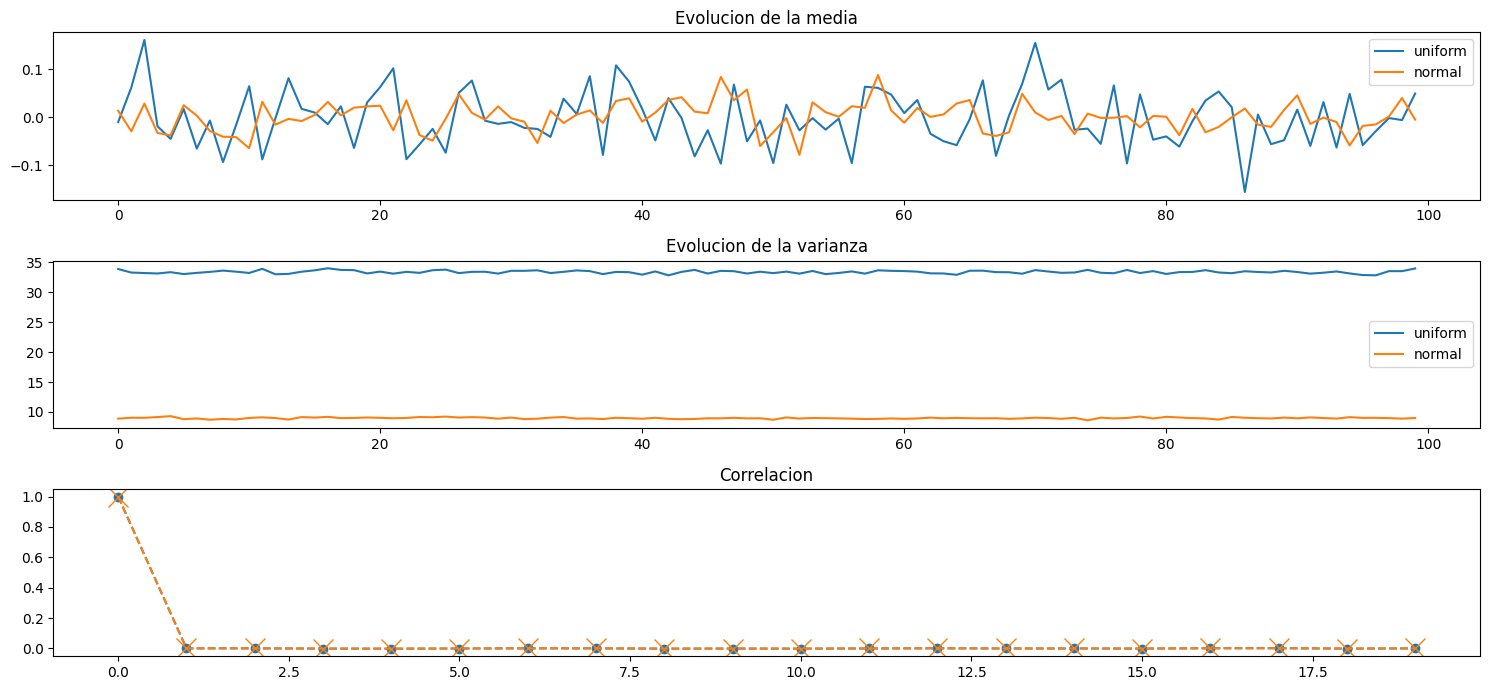

In [34]:
fig, axs = plt.subplots(3,1, figsize = (15,7))
axs[0].set_title('Evolucion de la media')
axs[0].plot(x_mean, label = 'uniform')
axs[0].plot(y_mean, label = 'normal')
axs[0].legend()
axs[1].set_title('Evolucion de la varianza')
axs[1].plot(x_var, label = 'uniform')
axs[1].plot(y_var, label = 'normal')
axs[1].legend()
axs[2].set_title('Autocorrelacion')
axs[2].plot(x_corr[:20], 'o--', label = 'uniform')
axs[2].plot(y_corr[:20], 'x--', label = 'normal', ms=15)
fig.tight_layout()

## Caminata aleatoria

In [62]:
def random_walk(prev, gen):
    return prev + gen(0,1)

gen = np.random.default_rng()
steps = 100000
x = [0]
for i in range(steps):
    x.append(random_walk(x[-1], gen.normal))
x = np.array(x)
ws = 100 # subventana para calcular
x_mean = [x[i*ws:(i+1)*ws].mean() for i in range(steps//ws)]
x_var = [x[i*ws:(i+1)*ws].std()**2 for i in range(steps//ws)]
x_corr = correlate(x, x, mode = 'same')[steps//2:]
x_corr /= x_corr[0]

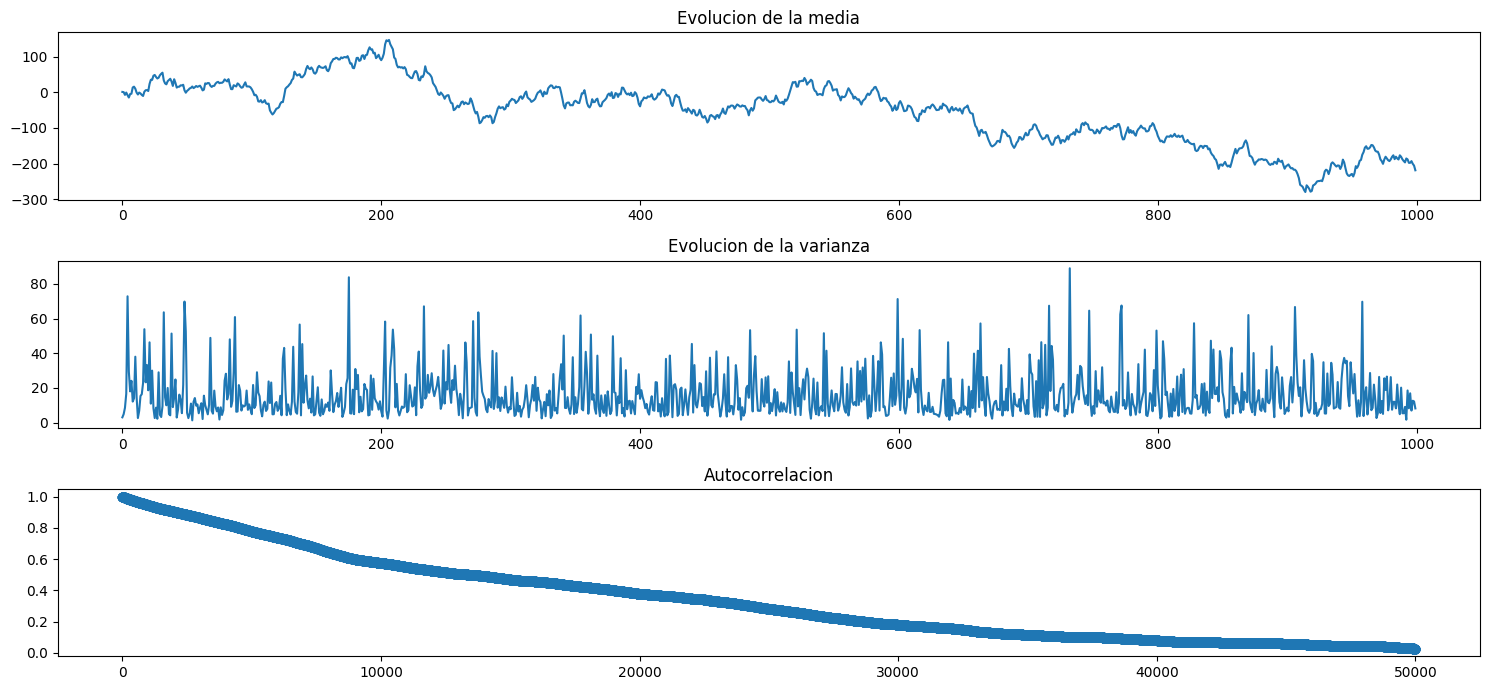

In [66]:
fig, axs = plt.subplots(3,1, figsize = (15,7))
axs[0].set_title('Evolucion de la media')
axs[0].plot(x_mean)
axs[1].set_title('Evolucion de la varianza')
axs[1].plot(x_var)
axs[2].set_title('Autocorrelacion')
axs[2].plot(x_corr, 'o--')
fig.tight_layout()

## Procesos de media movil

In [ ]:
def MA(q:int, beta:list, gen):
    